In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

# Plot Histograms

In [2]:
all_posts_df = pd.read_csv('../data/merged_q/all_posts.csv')
all_posts_df.head()

,id,summarized,text,root,length
0,r2wyka,0,Can you learn to be less afraid?,learn,8
1,r2woiu,1,Do you like persons with a little edge to them?,like,11
2,r2wc2q,0,"Why doesn't Activia use the word ""yogurt"" on t...",use,14
3,r2w43k,0,Do you ever feel like everyone else has it tog...,feel,13
4,r2vbm3,0,Does pressing keyboard keys reflect your perso...,reflect,8


Min = 2
Max = 105
Mean = 11.84353245332413
Median = 10.0


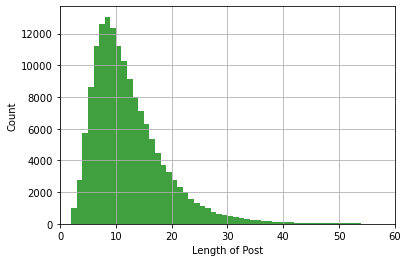

In [3]:
lens = all_posts_df['length'].tolist()
print('Min = {}'.format(min(lens)))
print('Max = {}'.format(max(lens)))
print('Mean = {}'.format(np.mean(lens)))
print('Median = {}'.format(np.median(lens)))

n, bins, patches = plt.hist(lens, range(60), facecolor='g', alpha=0.75)

plt.xlabel('Length of Post')
plt.ylabel('Count')
plt.xlim(0, 60)
plt.grid(True)
plt.show()

In [4]:
all_replies_df = pd.read_csv('../data/merged_q/all_replies.csv')
all_replies_df.head()

,id,parent_id,summarized,text,length
0,hm5iqwj,r2nmvy,1,Conscious Club is campy in a good way,8
1,hm5jftd,r2npa3,0,I take one to two hours a day where I listen t...,24
2,hm5kaqv,r2nmvy,0,I like Scary Pockets.,5
3,hm5kddu,r2nylj,0,what keeps me calm is my prescription medication,8
4,hm5kig9,r2nylj,1,Wow you're amazingly talented.,6


Min = 2
Max = 360
Mean = 11.509432207808716
Median = 9.0


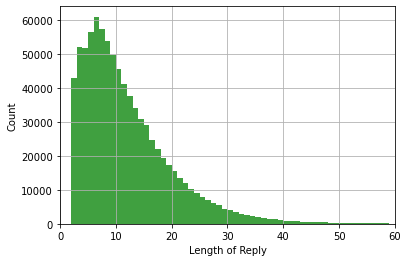

In [5]:
lens = all_replies_df['length'].tolist()
print('Min = {}'.format(min(lens)))
print('Max = {}'.format(max(lens)))
print('Mean = {}'.format(np.mean(lens)))
print('Median = {}'.format(np.median(lens)))

n, bins, patches = plt.hist(lens, range(60), facecolor='g', alpha=0.75)

plt.xlabel('Length of Reply')
plt.ylabel('Count')
plt.xlim(0, 60)
plt.grid(True)
plt.show()

# Check Number

In [6]:
date_suffices = [
    '20210501_20211231',
    '20210101_20210430',
    '20200101_20201231',
    '20190101_20191231',
    '20180101_20181231',
    '20170101_20171231',
    '20160101_20161231'
]

In [7]:
for date_suffix in date_suffices:
    submissions_df = pd.read_csv('../data/reddit/filtered_q/casual_conv_submissions_{}.csv'.format(date_suffix))
    print(date_suffix, submissions_df.shape[0])

20210501_20211231 20756
20210101_20210430 8470
20200101_20201231 60261
20190101_20191231 47595
20180101_20181231 47640
20170101_20171231 34064
20160101_20161231 20968


In [14]:
for date_suffix in date_suffices:
    comments_df = pd.read_csv('../data/reddit/raw/casual_conv_comments_{}.csv'.format(date_suffix))
    print('{} #All: {}, #2nd: {}'.format(date_suffix, comments_df.shape[0],
          comments_df[comments_df['link_id'] == comments_df['parent_id']].shape[0]))

20210501_20211231 #All: 311185, #2nd: 165434
20210101_20210430 #All: 114924, #2nd: 60303
20200101_20201231 #All: 936414, #2nd: 475643
20190101_20191231 #All: 765173, #2nd: 368159
20180101_20181231 #All: 1051149, #2nd: 457794
20170101_20171231 #All: 967407, #2nd: 381294
20160101_20161231 #All: 6400, #2nd: 240


In [16]:
for date_suffix in date_suffices:
    comments_df = pd.read_csv('../data/reddit/filtered_q/casual_conv_comments_{}.csv'.format(date_suffix))
    print(date_suffix, comments_df.shape[0])

20210501_20211231 73077
20210101_20210430 28280
20200101_20201231 194411
20190101_20191231 165944
20180101_20181231 203263
20170101_20171231 171235
20160101_20161231 67


In [2]:
all_posts_df = pd.read_csv('../data/merged_q/all_posts.csv')
all_posts_df.head()

,id,summarized,text,root,length
0,r2wyka,0,Can you learn to be less afraid?,learn,8
1,r2woiu,1,Do you like persons with a little edge to them?,like,11
2,r2wc2q,0,"Why doesn't Activia use the word ""yogurt"" on t...",use,14
3,r2w43k,0,Do you ever feel like everyone else has it tog...,feel,13
4,r2vbm3,0,Does pressing keyboard keys reflect your perso...,reflect,8


In [3]:
print(all_posts_df.shape)

(153559, 5)


In [4]:
all_replies_df = pd.read_csv('../data/merged_q/all_replies.csv')
all_replies_df.head()

,id,parent_id,summarized,text,length
0,hm5iqwj,r2nmvy,1,Conscious Club is campy in a good way,8
1,hm5jftd,r2npa3,0,I take one to two hours a day where I listen t...,24
2,hm5kaqv,r2nmvy,0,I like Scary Pockets.,5
3,hm5kddu,r2nylj,0,what keeps me calm is my prescription medication,8
4,hm5kig9,r2nylj,1,Wow you're amazingly talented.,6


In [5]:
print(all_replies_df.shape)

(849589, 5)


In [8]:
all_posts_df = pd.read_csv('../data/merged_q/all_posts_max_len_10.csv')
print(all_posts_df.shape)
N = all_posts_df.shape[0]
print(N*N*32/8/1024/1024/1024)
all_replies_df = pd.read_csv('../data/merged_q/all_replies_max_len_10.csv')
print(all_replies_df.shape)
N = all_replies_df.shape[0]
print(N*N*32/8/1024/1024/1024)

(65017, 5)
15.747585479170084
(236322, 5)
208.0503392368555


In [7]:
ed_first_turns_df = pd.read_csv('../data/ed/filtered_q/ed_first_turns.csv')
print(ed_first_turns_df.shape)
ed_second_turns_df = pd.read_csv('../data/ed/filtered_q/ed_second_turns.csv')
print(ed_second_turns_df.shape)

(13312, 6)
(13312, 4)


# Questions

In [11]:
all_posts_df = pd.read_csv('../data/merged_q/all_posts_max_len_10.csv')
all_posts_df.head()

,id,summarized,text,root,length
0,r2vbm3,0,Does pressing keyboard keys reflect your perso...,reflect,8
1,r2unhy,0,Need some socialization this week ☺️,need,7
2,r2tj6o,1,Quarter life crises starts now maybe haha?,start,8
3,r2sz0f,1,Do I want to get better?,want,7
4,r2sj5n,0,Should I drop them?,drop,5


In [12]:
indices = []
for i in tqdm(range(all_posts_df.shape[0])):
    text = all_posts_df.iloc[i]['text']
    if text.endswith('?'):
        indices.append(i)
all_posts_q_df = all_posts_df.iloc[indices]
all_posts_q_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 65017/65017 [00:04<00:00, 15646.89it/s]


,id,summarized,text,root,length
0,r2vbm3,0,Does pressing keyboard keys reflect your perso...,reflect,8
2,r2tj6o,1,Quarter life crises starts now maybe haha?,start,8
3,r2sz0f,1,Do I want to get better?,want,7
4,r2sj5n,0,Should I drop them?,drop,5
7,r2r2mi,1,Does anyone here work 2nd shift?,work,7


In [16]:
random_idx = np.random.choice(indices, 100, replace = False)
all_posts_q_df = all_posts_df.iloc[random_idx]
all_posts_q_df

,id,summarized,text,root,length
27025,ckrwfr,0,Should I quit my new job?,quit,7
40947,8uyjmx,0,Does hard work really ever pay off?,pay,8
11702,hc3zct,0,Why does my brother never take my side?,take,9
35269,9xwj30,1,How do you guys keep positive?,keep,7
4980,lwpcig,0,How do I survive this situation?,survive,7
...,...,...,...,...,...
28972,c25jn3,0,Have you ever had a ghost experience?,have,8
14697,g40jwr,0,Do you eat potato skins on baked potatoes?,eat,9
40385,8yrm5q,1,Cheesy or should candid photos be hung up?,hang,9
59427,5uq5jr,0,What TV series are you currently enjoying?,enjoy,8


In [17]:
all_posts_q_df.to_csv('../data/merged_q/all_posts_max_len_10_sample_questions.csv', index = False)